# ODE Animate Introduction

This is a module intended to aid mathematical calculations, by providing an expressive way of writing mathematical functions in Python, and it's not meant to be used as a replacement for [`sympy`](https://sympy.org/) or [`numpy`](https://numpy.org/).

> This project is mostly academic interest, and started as a way to teach python to some of my colleague.

The user is encourage to _audit_ and _improve_ the code in order to support new features,
but at the same time I would like the users to respect the development plan and road map for the project.

An important thing to mention is that the project should include _nearly no_ dependencies. We are using [`matplotlib`](https://matplotlib.org/), because it is the _de facto_ plotting tool in the language (as a concecuense we are using `numpy` but not directly in this modules' code).

## Two dimensional tools

The initial mission for this project is to try and exploit the limits of two dimensional objects, _a.k.a._ anything plotable in a two dimensional plane.

For example:

### Real valued curves

We can start with the basics, since the language ofers a module named `math`, we can import it and make use of it without any extra hickups,
with functions included in that module (or any other module), we can implement a function named as we wish (i.e. `real_curve`), that technically
should be a single valued function, that returns a single numerical value, but all the _magic_, happens when we use the _decorator_.

> A decorator is a concept in computer programming that will allow us to extend the behaviour of a function, by adding _pre_ and _post_ execution. (more or so).
> We'll leave this a link for further reading on decorators, from [Real Python](https://realpython.com/primer-on-python-decorators/).
>
> The decorator notation in the language is to write an `@decorator_name` exactly one line prior to the `def` declaration, and we'll see ahead how to do so.

The decorator to be used is `Curve1D`, which it will asume, that your input and output argument is a _numerical type_ (anything compatible with the `number` base class in python),
meaning we can write a _real curve_ (as seen in most pre-calculus and calculus courses), as follows.

In [1]:
from math import sin
from odeanimate.curve import Curve1D


@Curve1D
def real_curve(x):
    """$(x^2 - 4)sin(x)$"""
    return (x**2 - 4) * sin(x)


real_curve

> WORK IN PROGRESS
>
>
> If you would like to add a docstring, the program will use that to provide a _nice_ output when using Jupyter type enviroments.
> The recomended practice will be to include in the first line the latex expression corresponding to your function definition.
>
> Discission needed on this topic.

Now the natural next step would be to define an interval to evaluate a function, thus, we use the `Interval` object by defining a lower and upper bound.

> A remark here is that since this is meant for numerical computation, the intervals are _closed_ in the mathematical sense of the word. (They include the uper and lower limits)

> In Jupyter like enviroments they show up as tuples of two numbers.

In [2]:
from odeanimate.domains import Interval

interval = Interval(1, 4)
interval

<Interval [1, 4]>

Now that we have a function an an interval, we can put them together by using the _method_ `map` which belongs to the object `Curve1D` we created earlier.

The method `map` recieves _one_ required argument which is an `Interval` type, and it recieves a secondary optional argument which we internally call `h`, that is used
as a step for evaluation.

When we use it, in a Jupyter like enviroment we'll be able to see a _table_ which expreses the results of the evaluation.

In [3]:
trayectory = real_curve.map(interval, 0.25)
trayectory

$x$,$y$
1,-2.5244129544236893
1.25,-2.3131500096792412
1.5,-1.7456162265570954
1.75,-0.9224868251943159
2.0,0.0
2.25,0.8267027716934163
2.5,1.346562324233902
2.75,1.3596672841864317
3.0,0.7056000402993361
3.25,-0.7100305703538362


> _WORK IN PROGRES_
>
> If the user is familiar with the `pandas` module, we'll let you know that objects of this kind should behave in similar fashon to a `DataFrame`.

In [4]:
trayectory.x

Vector(1, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0)

Now that we have a trajectory in our hands (which is the table of values resulting from the evaluation), we can start thinking
in _ploting_ the does values as a _curve_.

This is achieved by using `matplotlib`, in the regular way you would expect.

> The rational for not messing with ploting, is that the user will experiment with that module often in different enviroments and we do not want to 
> get in the way of messing with that experiencie.
>
> The only difference is that regularly people plot `numpy.array`.


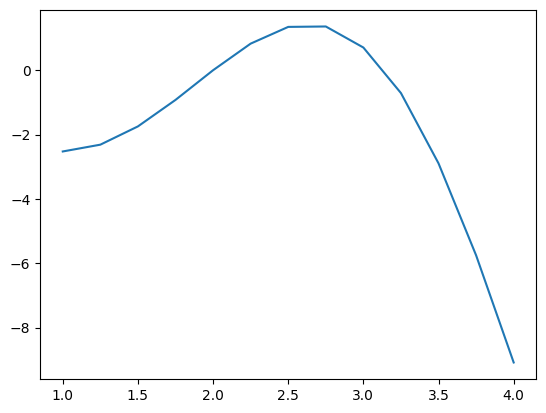

In [5]:
%matplotlib notebook
from matplotlib.figure import Figure

fig = Figure()
ax = fig.add_subplot()
ax.plot(trayectory.x, trayectory.y)
fig

Now, we can use another method to investigate more the behaviour of this `real_curve` by inspecting it's derivative.

For this we have a _utility_ function that returns you a _calculate function_ for the derivative on the initial function.
The method numerical derivation is done by calculating the slope of a _secant_, at $x - h$ and $x + h$ where $h$ is an optional
argument for the derivative method and by default is set to the default `odeanimate.utils.h`.

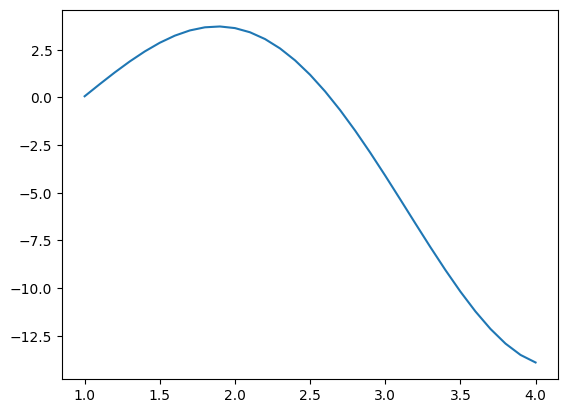

In [6]:
velocity = real_curve.derivative().map(interval, 0.1)

fig = Figure()
ax = fig.add_subplot()
ax.plot(velocity.x, velocity.y)
fig

Now given the previous two examples, we can easily define an interesting (quite basic) plot, which is
the one of the _tangent line_ on a curve for a given point $t$.

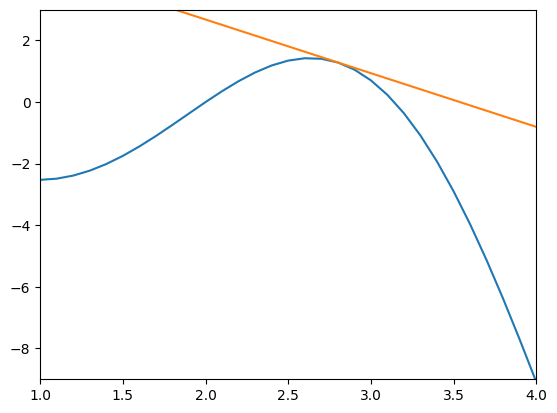

In [7]:
# Define a value where we want to place the derivative.
t = 2.8

real_curve_derivative = real_curve.derivative()

# Define a function for a line passing through
@Curve1D
def tangent_line(x):
    return (x - t) * real_curve_derivative(t) + real_curve(t)


# Plot as usual
fig = Figure()
ax = fig.add_subplot()
ax.set_xlim(1, 4)
ax.set_ylim(-9, 3)

trayectory = real_curve.map(interval, 0.1)
ax.plot(trayectory.x, trayectory.y)

line_trayectory = tangent_line.map(interval)
ax.plot(line_trayectory.x, line_trayectory.y)

fig

Now taking this a step further, let's attempt to do an animation. First we would like to be able to generate the plot as a
single function of paramater `t`.

In [8]:
real_curve_derivative = real_curve.derivative()


def figure_to_plot(t):
    # Define a function for a line passing through
    @Curve1D
    def tangent_line(x):
        return (x - t) * real_curve_derivative(t) + real_curve(t)

    # Plot as usual
    fig = Figure()
    ax = fig.add_subplot()
    ax.set_xlim(1, 4)
    ax.set_ylim(-9, 3)

    trayectory = real_curve.map(interval, 0.1)
    ax.plot(trayectory.x, trayectory.y)

    line_trayectory = tangent_line.map(interval)
    ax.plot(line_trayectory.x, line_trayectory.y)
    return fig

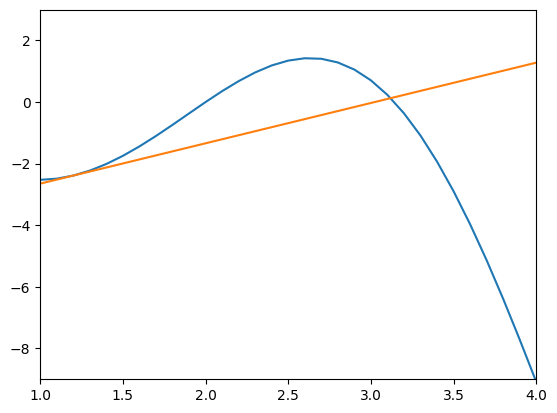

In [9]:
figure_to_plot(1.2)

In [10]:
from tempfile import TemporaryDirectory
from pathlib import Path
import ffmpeg

Path("../../assets").resolve()

PosixPath('/Users/salgado.miguel/Documents/ekiim/odeanimate/assets')

In [11]:
! rm ../../assets/animation.webm
with TemporaryDirectory() as dirname:
    path = Path(dirname)
    animation_interval = Interval(0, 1)
    t_func = lambda x: x * 3 + 1
    for i, s in enumerate(animation_interval(0.005)):
        t = t_func(s)
        fig = figure_to_plot(t)
        fig.savefig(str(path / f"fig-{i:05d}.png"))
        del fig
    (
        ffmpeg.input(str(path / "fig-*.png"), pattern_type="glob", framerate=10)
        .output("../../assets/animation.webm")
        .run(capture_stderr=True)
    )

In [12]:
from IPython.display import Video

Video("../../assets/animation.webm")

In [13]:
! ls -liha ../../assets/animation.webm

8460154 -rw-r--r--  1 salgado.miguel  staff    85K Apr 28 20:12 ../../assets/animation.webm
